In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
## loading the dataset
df=pd.read_csv("crocodile_dataset.csv")

In [94]:
df.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation ID        1000 non-null   int64  
 1   Common Name           1000 non-null   object 
 2   Scientific Name       1000 non-null   object 
 3   Family                1000 non-null   object 
 4   Genus                 1000 non-null   object 
 5   Observed Length (m)   1000 non-null   float64
 6   Observed Weight (kg)  1000 non-null   float64
 7   Age Class             1000 non-null   object 
 8   Sex                   1000 non-null   object 
 9   Date of Observation   1000 non-null   object 
 10  Country/Region        1000 non-null   object 
 11  Habitat Type          1000 non-null   object 
 12  Conservation Status   1000 non-null   object 
 13  Observer Name         1000 non-null   object 
 14  Notes                 1000 non-null   object 
dtypes: float64(2), int64(1

In [96]:
df.isnull().sum()

Observation ID          0
Common Name             0
Scientific Name         0
Family                  0
Genus                   0
Observed Length (m)     0
Observed Weight (kg)    0
Age Class               0
Sex                     0
Date of Observation     0
Country/Region          0
Habitat Type            0
Conservation Status     0
Observer Name           0
Notes                   0
dtype: int64

In [97]:
df.duplicated().sum()

np.int64(0)

In [98]:
## creating new column as BMI 
df['BMI'] = df["Observed Weight (kg)"] / (df["Observed Length (m)"] ** 2)

In [99]:
#droping Observation ID, Observer Name, Notes
df.drop(columns=["Observation ID","Observer Name","Notes","Date of Observation"],inplace=True)

In [100]:
columns=df.columns
columns

Index(['Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Country/Region', 'Habitat Type', 'Conservation Status', 'BMI'],
      dtype='object')

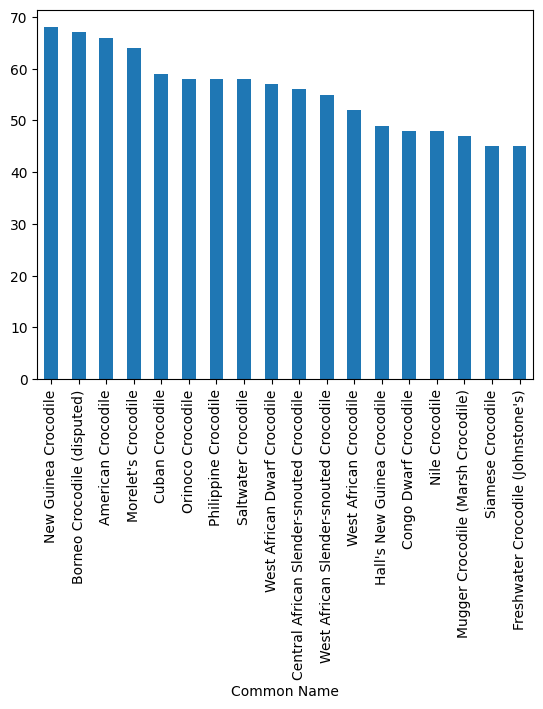

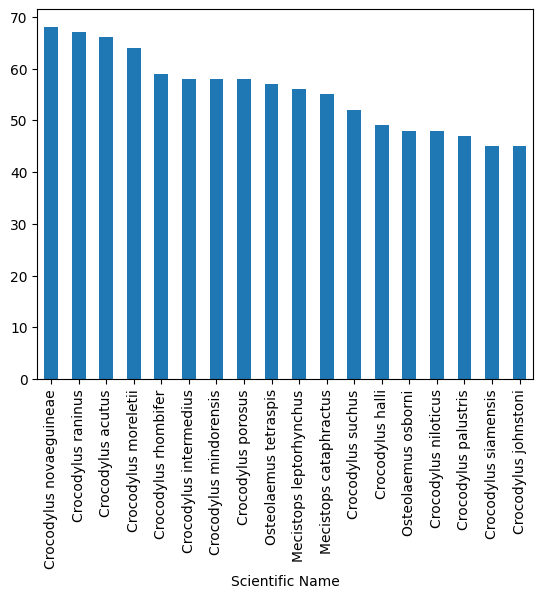

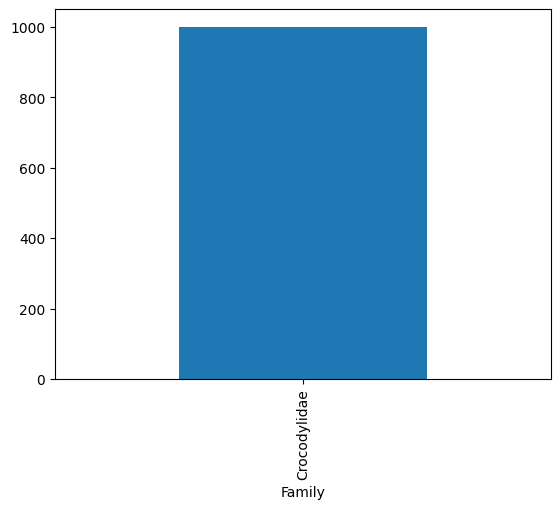

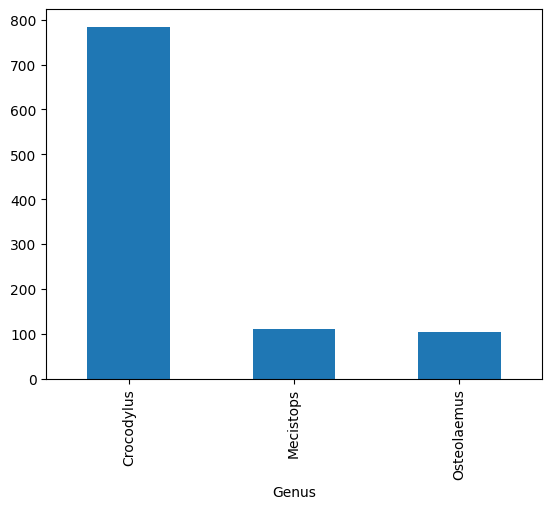

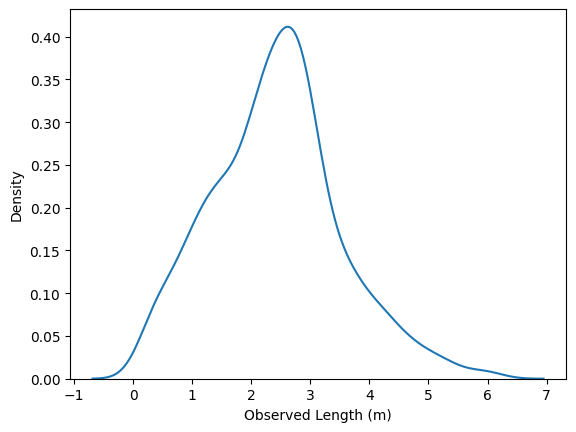

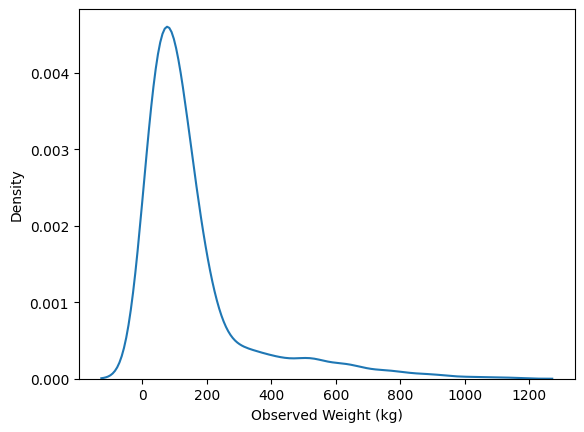

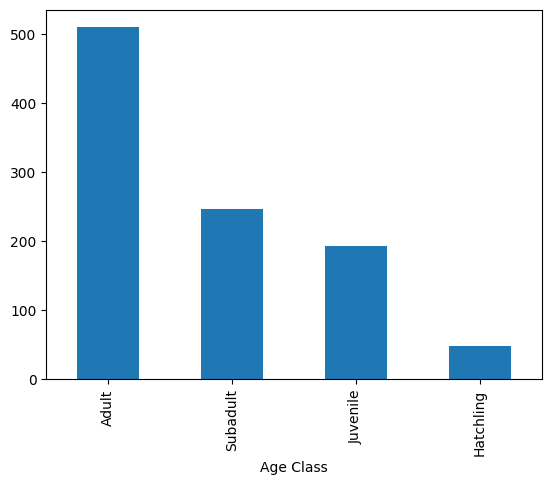

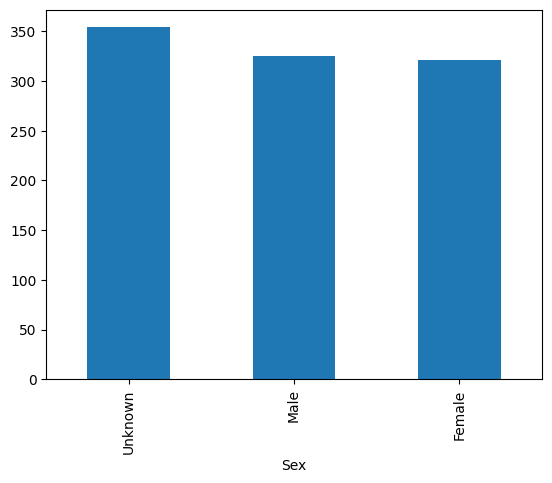

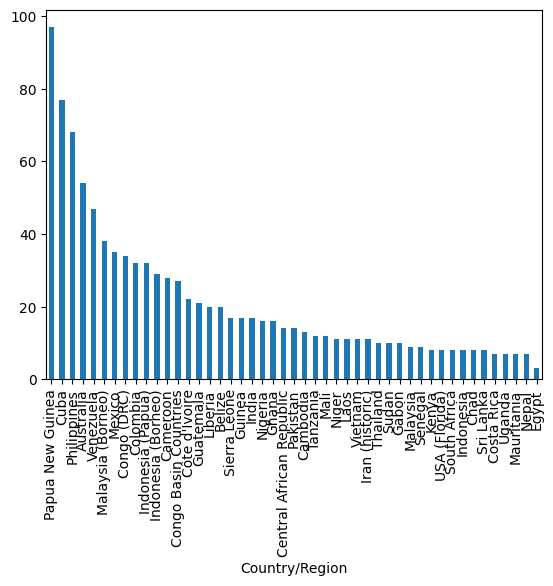

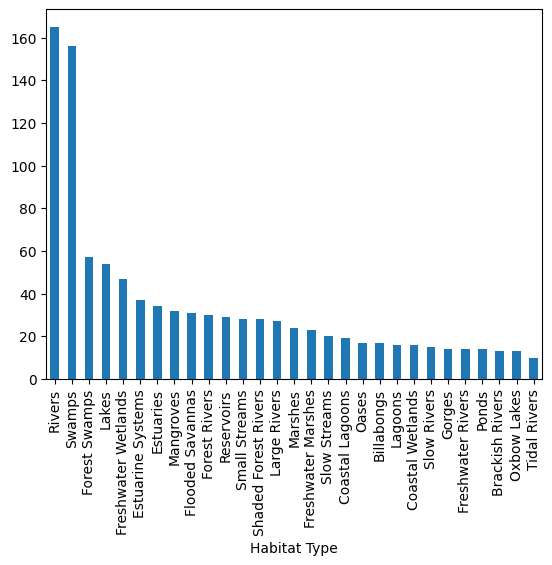

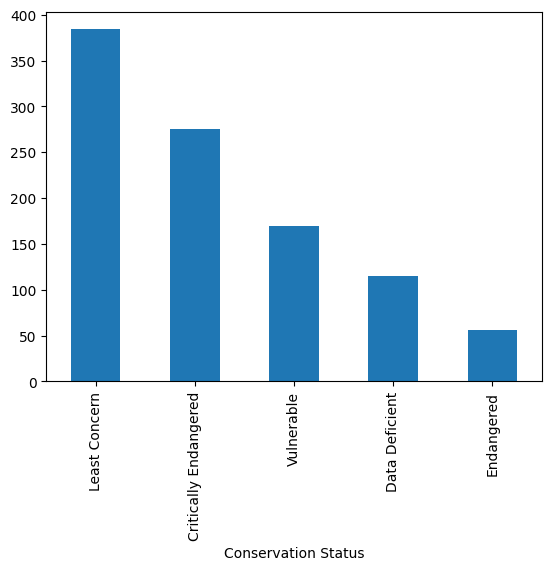

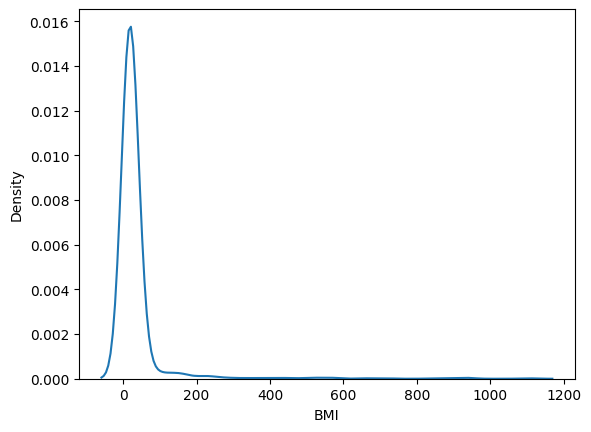

In [101]:
def value_check(x):
    if x in ['Observed Length (m)', 'Observed Weight (kg)','BMI']:
        plt.Figure(figsize=(10,8))
        sns.kdeplot(data=df,x=x)
        plt.show()
    else:
        plt.Figure(figsize=(10,8))
        df[x].value_counts().plot(kind="bar")
        plt.show()
for i in columns:
    value_check(i)

In [102]:
df.sample(5)

,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Country/Region,Habitat Type,Conservation Status,BMI
389,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.82,59.0,Adult,Unknown,Mexico,Rivers,Least Concern,17.811858
38,Freshwater Crocodile (Johnstone's),Crocodylus johnstoni,Crocodylidae,Crocodylus,1.05,24.0,Juvenile,Female,Australia,Freshwater Rivers,Least Concern,21.768707
885,West African Crocodile,Crocodylus suchus,Crocodylidae,Crocodylus,2.26,102.4,Adult,Female,Mauritania,Oases,Least Concern,20.048555
881,Saltwater Crocodile,Crocodylus porosus,Crocodylidae,Crocodylus,4.23,524.7,Subadult,Male,Indonesia,Mangroves,Least Concern,29.324481
831,Borneo Crocodile (disputed),Crocodylus raninus,Crocodylidae,Crocodylus,2.65,118.4,Adult,Female,Malaysia (Borneo),Estuarine Systems,Data Deficient,16.860093


In [103]:
df.drop(columns=["Family"],inplace=True)

In [104]:
species_counts = df.groupby(['Country/Region', 'Scientific Name']).size().reset_index(name='Count')
pivot_table = species_counts.pivot(index='Country/Region', columns='Scientific Name', values='Count').fillna(0).astype(int)
dominant_species = pivot_table.idxmax(axis=1)
pivot_table['Most_Suitable_For'] = dominant_species
pivot_table["Most_Suitable_For"]

Country/Region
Australia                      Crocodylus johnstoni
Belize                         Crocodylus moreletii
Cambodia                       Crocodylus siamensis
Cameroon                    Mecistops leptorhynchus
Central African Republic        Osteolaemus osborni
Chad                              Crocodylus suchus
Colombia                     Crocodylus intermedius
Congo (DRC)                     Osteolaemus osborni
Congo Basin Countries       Mecistops leptorhynchus
Costa Rica                        Crocodylus acutus
Cuba                           Crocodylus rhombifer
Côte d'Ivoire                Mecistops cataphractus
Egypt                          Crocodylus niloticus
Gabon                       Mecistops leptorhynchus
Ghana                         Osteolaemus tetraspis
Guatemala                      Crocodylus moreletii
Guinea                       Mecistops cataphractus
India                            Crocodylus porosus
Indonesia                        Crocodylus poros

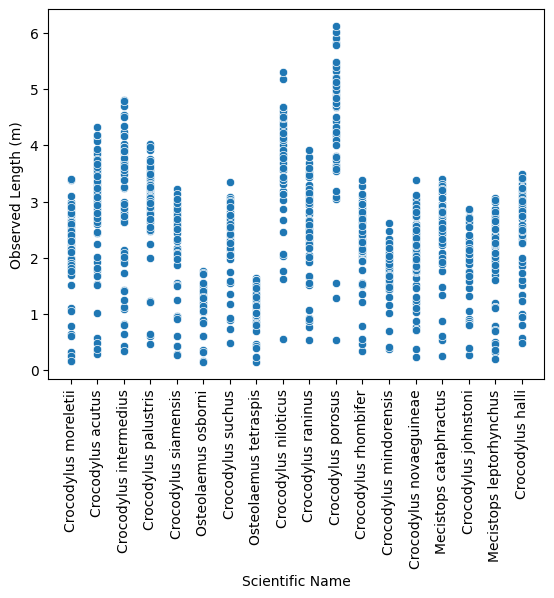

In [105]:
sns.scatterplot(data=df, x='Scientific Name', y='Observed Length (m)')
plt.xticks(rotation=90)
plt.show()

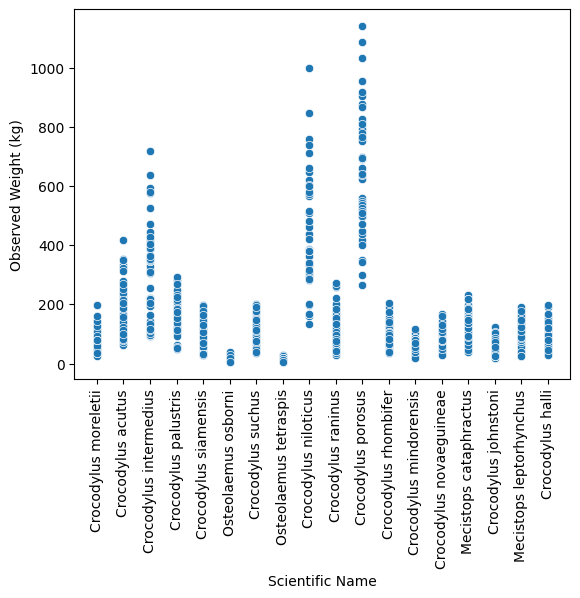

In [106]:
sns.scatterplot(data=df, x='Scientific Name', y='Observed Weight (kg)')
plt.xticks(rotation=90)
plt.show()

In [107]:
def group_rare(col, threshold=10):
    freq = col.value_counts()
    rare = freq[freq < threshold].index
    return col.apply(lambda x: x if x not in rare else 'Other')

df['Country_grouped'] = group_rare(df['Country/Region'])
df['Habitat_grouped'] = group_rare(df['Habitat Type'],threshold=20)

In [108]:
df.sample(5)

,Common Name,Scientific Name,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Country/Region,Habitat Type,Conservation Status,BMI,Country_grouped,Habitat_grouped
261,Philippine Crocodile,Crocodylus mindorensis,Crocodylus,2.10,59.1,Adult,Male,Philippines,Rivers,Critically Endangered,13.401361,Philippines,Rivers
648,West African Crocodile,Crocodylus suchus,Crocodylus,2.42,111.8,Adult,Male,Niger,Oases,Least Concern,19.090226,Niger,Other
595,Saltwater Crocodile,Crocodylus porosus,Crocodylus,4.31,514.4,Subadult,Female,Philippines,Estuaries,Least Concern,27.691496,Philippines,Estuaries
123,Cuban Crocodile,Crocodylus rhombifer,Crocodylus,2.26,86.1,Adult,Male,Cuba,Swamps,Critically Endangered,16.857232,Cuba,Swamps
490,Orinoco Crocodile,Crocodylus intermedius,Crocodylus,2.66,209.5,Juvenile,Female,Colombia,Flooded Savannas,Critically Endangered,29.608796,Colombia,Flooded Savannas


In [109]:
df.drop(columns=["Country/Region","Habitat Type"],inplace=True)

In [110]:
df.drop(columns=["Common Name","Genus"],inplace=True)

In [111]:
df.sample(5)

,Scientific Name,Observed Length (m),Observed Weight (kg),Age Class,Sex,Conservation Status,BMI,Country_grouped,Habitat_grouped
310,Crocodylus novaeguineae,2.26,83.5,Adult,Unknown,Least Concern,16.348187,Indonesia (Papua),Rivers
477,Crocodylus rhombifer,2.88,125.2,Subadult,Female,Critically Endangered,15.094522,Cuba,Freshwater Wetlands
242,Osteolaemus osborni,1.46,23.3,Adult,Unknown,Data Deficient,10.930756,Central African Republic,Forest Swamps
940,Osteolaemus osborni,1.28,20.5,Subadult,Unknown,Data Deficient,12.512207,Congo (DRC),Slow Streams
610,Crocodylus raninus,2.94,122.6,Adult,Unknown,Data Deficient,14.183905,Malaysia (Borneo),Estuarine Systems


In [112]:
X=df.drop(columns=["Scientific Name"])
y=df["Scientific Name"]

In [113]:
df["Habitat_grouped"].value_counts().index

Index(['Other', 'Rivers', 'Swamps', 'Forest Swamps', 'Lakes',
       'Freshwater Wetlands', 'Estuarine Systems', 'Estuaries', 'Mangroves',
       'Flooded Savannas', 'Forest Rivers', 'Reservoirs', 'Small Streams',
       'Shaded Forest Rivers', 'Large Rivers', 'Marshes', 'Freshwater Marshes',
       'Slow Streams'],
      dtype='object', name='Habitat_grouped')

In [117]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

unique_labels = sorted(pd.Series(y_train).unique())
label_map = {label: idx for idx, label in enumerate(unique_labels)}
joblib.dump(label_map, "label_map.pkl")

y_train_encoded = pd.Series(y_train).map(label_map).astype(int)
y_test_encoded = pd.Series(y_test).map(label_map).fillna(-1).astype(int)

conservation_order = [["Least Concern", "Data Deficient", "Vulnerable", "Endangered", "Critically Endangered"]]
trans1 = ColumnTransformer(transformers=[
    ("onehot_basic", OneHotEncoder(handle_unknown='ignore'), ["Age Class", "Sex", "Country_grouped", "Habitat_grouped"]),
    ("ordinal_status", OrdinalEncoder(categories=conservation_order), ["Conservation Status"]),
    ("scaler_bmi", StandardScaler(), ["BMI", "Observed Length (m)", "Observed Weight (kg)"])
], remainder="passthrough")

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
pipeline = Pipeline(steps=[
    ("preprocessing", trans1),
    ("classifier", model)
])

pipeline.fit(X_train, y_train_encoded)
y_pred = pipeline.predict(X_test)


In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, log_loss
print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Precision (macro):", precision_score(y_test_encoded, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test_encoded, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test_encoded, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

Test Accuracy: 0.955
Precision (macro): 0.9571077841911175
Recall (macro): 0.9556505223171889
F1 Score (macro): 0.9553908916057566

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.70      0.74        10
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         7
           5       0.93      1.00      0.96        13
           6       1.00      0.85      0.92        13
           7       0.81      0.87      0.84        15
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         9
          12       1.00      0.90      0.95        10
          13       0.80      0.89      0.84         9
          14       0.91      1.00

In [119]:
joblib.dump(pipeline, "pipeline.pkl")

['pipeline.pkl']